In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('calificaciones.csv')
df

,evaluacion_1,evaluacion_2,calificacion_final
0,3.939394,8.939394,-0.451867
1,3.131313,8.131313,-1.234300
2,1.111111,6.111111,-4.013626
3,4.646465,9.646465,0.257512
4,8.585859,13.585859,8.000398
...,...,...,...
95,1.616162,6.616162,-3.866378
96,9.292929,14.292929,7.109215
97,4.848485,9.848485,0.480654
98,0.505051,5.505051,-4.755665


## Visualizamos los datos

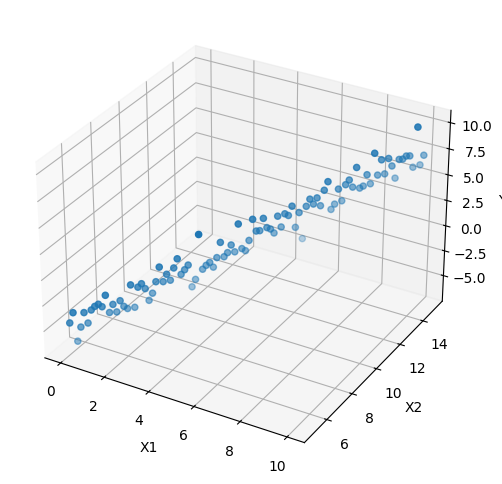

In [17]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(df['evaluacion_1'], df['evaluacion_2'], df['calificacion_final'], label="Datos con ruido")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()


Notamos que tiende a ser lineal la distribución de los datos.

## Linear Regression from Scratch

In [18]:
class LinearRegression():
    def __init__(self, number_features, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.number_features = number_features
        self.bethas = np.random.rand(self.number_features + 1)

    def fit(self, X, y):
        for iterations in range(self.n_iters):
            gradients = 2 / len(X) * X.T.dot(X.dot(self.bethas) - y) # Gradiente del error cuadratico medio
            self.bethas = self.bethas - self.learning_rate * gradients
            self.bias = self.learning_rate * gradients


        


    def predict(self, X):
        return X.dot(self.bethas)# Prediccion de la regresion lineal
    

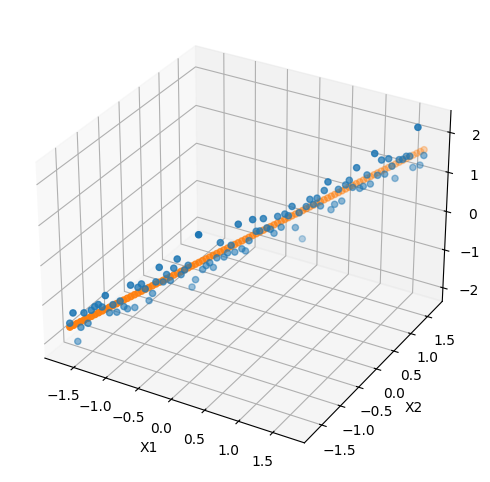

In [20]:
lr = LinearRegression(2)
#Normalizamos los datos
df['evaluacion_1'] = (df['evaluacion_1'] - df['evaluacion_1'].mean()) / df['evaluacion_1'].std()
df['evaluacion_2'] = (df['evaluacion_2'] - df['evaluacion_2'].mean()) / df['evaluacion_2'].std()
df['calificacion_final'] = (df['calificacion_final'] - df['calificacion_final'].mean()) / df['calificacion_final'].std()
X = df[['evaluacion_1', 'evaluacion_2']].values
X = np.c_[np.ones(len(X)), X]
y = df['calificacion_final'].values

lr.fit(X, y)
y_pred = lr.predict(X)

plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(df['evaluacion_1'], df['evaluacion_2'], df['calificacion_final'], label="Datos con ruido")
ax.scatter3D(df['evaluacion_1'], df['evaluacion_2'], y_pred, label="Regresion lineal")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()



## Evaluar el error en las predicciones

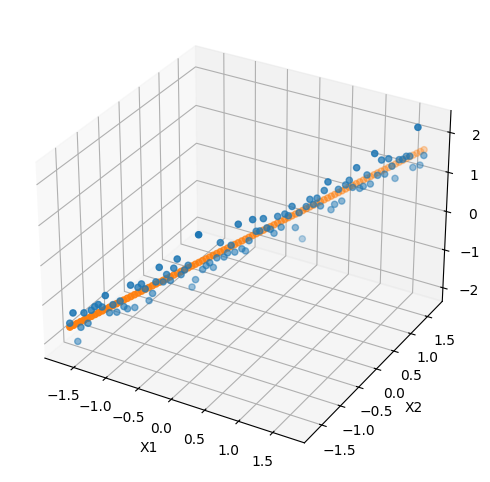

In [22]:
# Regresion lineal con scikit-learn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X[:, 1:], y)
y_pred = lr.predict(X[:, 1:])

plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(df['evaluacion_1'], df['evaluacion_2'], df['calificacion_final'], label="Datos con ruido")
ax.scatter3D(df['evaluacion_1'], df['evaluacion_2'], y_pred, label="Regresion lineal")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()
